# Data Science TP1 - ACP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

## Exercice 1 - PARTIE ACP

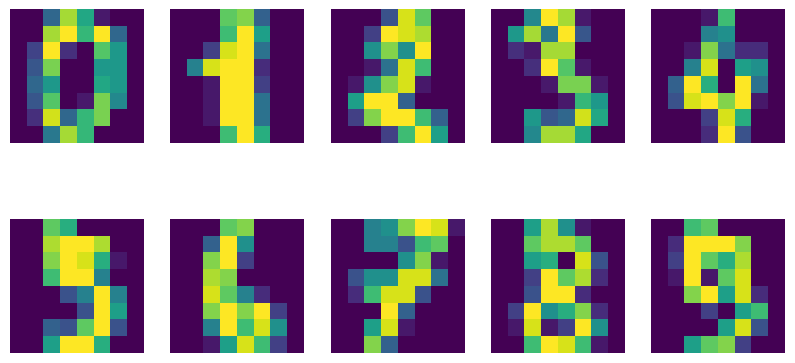

In [3]:
### Question 1 ###

# Fonction d'affichage 
def afficher_images(X, indices, n_lignes, n_colonnes):
    n_images = len(indices)
    
    if n_images > n_lignes * n_colonnes:
        print("Le nombre d'images dépasse le nombre d'axes disponibles.")
        return
    
    else :
        fig, axes = plt.subplots(n_lignes, n_colonnes, figsize=(10, 5))
        axes = axes.flatten()
        for i, k in enumerate(indices):
            if i < n_images:
                ax = axes[i]
                ax.matshow(X[k].reshape((8, 8)))
                ax.axis('off')


# Chargement des données
D = load_digits()


# Matrice de données et choix
X = D.data
afficher_images(X, range(10), 2, 5)

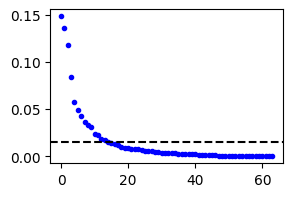

In [4]:
### Question 2 ###

pca = PCA()
pca.fit(X) #Trouve des coefficients qui résoud l'équation associée à la méthode, ici PCA
Y = pca.explained_variance_ #Valeurs propres


plt.figure(figsize=(3, 2)) #Taille du graphique
plt.plot(Y / Y.sum(), 'b.') #Affiche les parts de Variance expliqué par la variable k
plt.axhline(1 / X.shape[1], color='k', linestyle='--')

'\nUne autre manière de calculer F est de la manière suivante :\nLa décomposition en valeurs singulières de X est : X = U * S * V_transposé\nOn a que F = U * diag(S)\nAinsi : F = np.matmul(svdX.U,np.diag(svdX.S)) où svdX donne le tableau contenant les 3 matrices\nde la décomposition en valeurs singulières : U,S et V.\n'

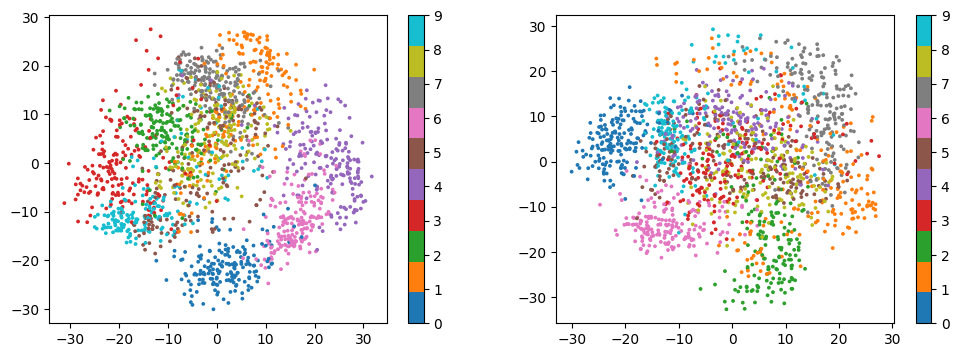

In [5]:
### Question 3 ###

#Fonction d'affichage des individus
def afficher_individu_PCA(X,i):
    F = pca.transform(X)  # Projète les données de X dans le nouvel espace calculé par PCA
    fig, axes = plt.subplots(1,i,figsize=(12,4))
    for j in range(i):
        fig.colorbar(axes[j].scatter(F[:,j], F[:,j+1], c = D.target, cmap=plt.get_cmap("tab10"), s=3),ax=axes[j])


afficher_individu_PCA(X,2)

'''
Une autre manière de calculer F est de la manière suivante :
La décomposition en valeurs singulières de X est : X = U * S * V_transposé
On a que F = U * diag(S)
Ainsi : F = np.matmul(svdX.U,np.diag(svdX.S)) où svdX donne le tableau contenant les 3 matrices
de la décomposition en valeurs singulières : U,S et V.
'''

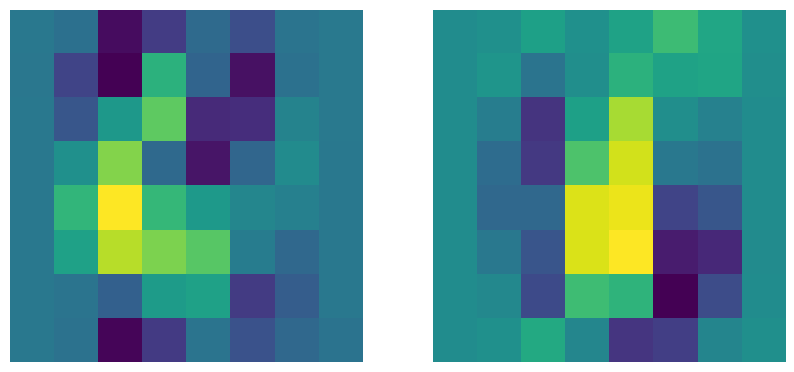

In [6]:
### Question 4 ###

'''
Les images de B montrent les formes et motifs caractéristiques que la PCA a identifiés dans les données. 
Par exemple, une composante principale pourrait capturer des traits distinctifs d'une certaine classe 
de chiffres dans le jeu de donnéesde chiffres manuscrits.
'''

# B est la matrice des composantes principales
B = pca.components_
afficher_images(B,range(2),1,2)

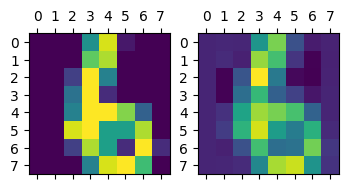

In [7]:
### Question 5 ###
#Ici en calculant à la main la SVD de X

''' 
i : indice de l'individu à représenter
n : nombres d'échantillon à prendre
'''

def comparaison_visuel_svd(X,n,i):
    U, S, Vh = np.linalg.svd(X, full_matrices=False)
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].matshow(X[i,:].reshape((8,8)))
    
    F = np.matmul(U,np.diag(S))
    Xp = np.matmul(F[:,:n], Vh[:n,:])
    axes[1].matshow(Xp[i,:].reshape((8,8)))
    

comparaison_visuel_svd(X, 20, 16)

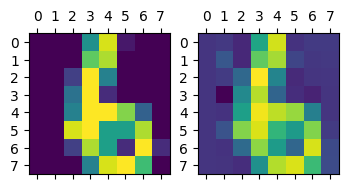

In [8]:
#Ici en utilisant directement le PCA de la bibliothèque

def comparaison_visuel_pca(X, n, i):
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X) #Projete les données
    X_reconstructed = pca.inverse_transform(X_reduced) #Reconstruit les données
    
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].matshow(X[i, :].reshape((8, 8)))
    axes[1].matshow(X_reconstructed[i, :].reshape((8, 8)))


# Utilisation
comparaison_visuel_pca(X, 30, 16)

### Exercice 1 - Partie ACI et NMF

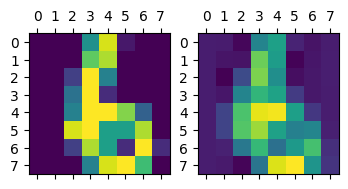

In [9]:
# Chargement des données
D = load_digits()


# Matrice de données et choix
X = D.data


def comparaison_visuel_aci(X, n, i):
    ica = FastICA(n_components=n, random_state=0)
    
    X_ica = ica.fit_transform(X) #Projette les données dans l'espace des composantes indépendantes
    X_reconstructed = ica.inverse_transform(X_ica) #Reconstruit les données à partir des composantes indépendantes

    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].matshow(X[i, :].reshape((8, 8)))
    axes[1].matshow(X_reconstructed[i, :].reshape((8, 8)))


comparaison_visuel_aci(X, 10, 16)


c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


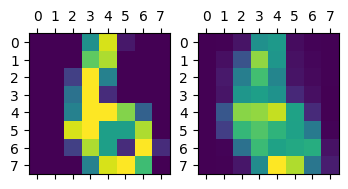

In [10]:
def comparaison_visuel_nmf(X, n, i):
    nmf = NMF(n_components=n, random_state=0)
    
    W = nmf.fit_transform(X)
    H = nmf.components_ #Matrice des poids
    X_reconstructed = np.dot(W, H)

    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].matshow(X[i, :].reshape((8, 8)))
    axes[1].matshow(X_reconstructed[i, :].reshape((8, 8)))

comparaison_visuel_nmf(X, 10, 16)